In [89]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from scipy import optimize
%matplotlib inline




In [105]:
im= np.fromfile("D:\\m1.dat",dtype=float,count=-1, sep=" ")
im2= np.fromfile("D:\\m2.dat",dtype=float,count=-1, sep=" ")
im.shape

(49L,)

In [106]:
im = np.reshape(im, (7,7))
im2 = np.reshape(im2, (7,7))


In [92]:
im=im/im2

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [109]:
im

array([[  1.70706000e-01,   1.55702000e-03,   7.95040000e-02,
          1.38409000e-04,   6.35566000e-02,   2.88000000e-08,
          5.27888000e-02],
       [  1.56000000e-03,   1.81696000e-03,   1.33565000e-03,
          4.56865000e-03,   5.43697000e-04,   9.88210000e-03,
          1.09636000e-05],
       [  7.95000000e-02,   1.34000000e-03,   5.26260000e-02,
          6.07532000e-04,   2.23343000e-02,   1.13887000e-03,
          1.43213000e-02],
       [  1.38409000e-04,   4.57000000e-03,   6.07532000e-04,
          1.70629000e-02,   2.74398000e-04,   1.00794000e-02,
          8.23675000e-04],
       [  6.35600000e-02,   5.43697000e-04,   2.23300000e-02,
          2.74398000e-04,   1.80118000e-02,   7.61381000e-05,
          8.00536000e-03],
       [  2.88000000e-08,   9.88000000e-03,   1.14000000e-03,
          1.00800000e-02,   7.61381000e-05,   1.63744000e-02,
          5.35259000e-04],
       [  5.27900000e-02,   1.09636000e-05,   1.43200000e-02,
          8.23675000e-04,   8.01

In [74]:
am

0.17226301999999999

In [94]:
np.savetxt('D:\\ans.txt', im, delimiter=' ')

In [62]:
plt.plot(V,z*10000)
#plt.xlim(0,-1.5)
#plt.ylim(0,0.1)
#plt.savefig('D:\\int.pdf', format='pdf')

NameError: name 'V' is not defined

In [168]:
np.savetxt('D:\\integral_V.txt', V, delimiter=' ')
np.transpose(im)[60].shape

(251L,)

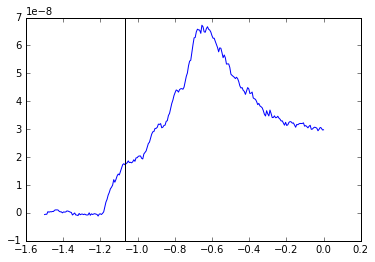

In [169]:

V=np.linspace(0,-1.5, num=251)
plt.plot(V,np.transpose(im)[60])
plt.axvline(x=-1.07, color='k', linestyle='-',lw=1)

In [171]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [172]:
dat=baseline_als(np.transpose(im)[60],1000,0.001,100)
a=np.transpose(im)[60]-dat

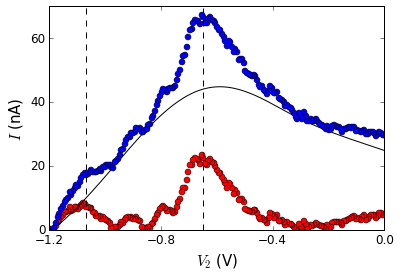

In [204]:

V=np.linspace(0,-1.5, num=251)
plt.plot(V,a*1E9,'or')
plt.plot(V,dat*1E9,'-k',lw=1)
plt.plot(V,np.transpose(im)[60]*1E9,'o')
plt.xlim(-1.2,0)
plt.ylim(0,70)
plt.axvline(x=-1.07, color='k', linestyle='dashed',lw=1)
plt.axvline(x=-0.65, color='k', linestyle='dashed',lw=1)
plt.xlabel("$V_2$ (V)",fontsize=15)
plt.ylabel("$I$ (nA)",fontsize=15)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True)
xt=np.linspace(-1.2, +0.4, num=4)
plt.xticks(np.arange(xt.min(), xt.max(),0.4),fontsize = 12)
yt=np.linspace(0, 70, num=20)
plt.yticks(np.arange(yt.min(), yt.max(),20),fontsize = 12)
plt.savefig('D:\\foc2.pdf',bbox_inches='tight', format='pdf')

In [144]:
im.shape

(251L, 121L)

In [145]:
im=np.transpose(im)
for i in xrange(121):
    dat=baseline_als(im[i],1000,0.001,100)
    im[i]=im[i]-dat


TypeError: Invalid dimensions for image data

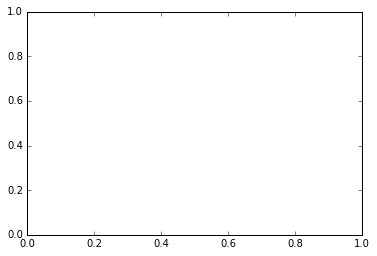

In [98]:
plt.imshow(im,aspect='auto')
plt.colorbar()

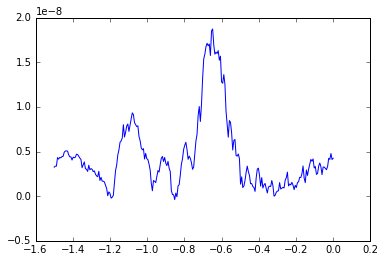

In [133]:
plt.plot(V,np.transpose(im)[60])